In [1]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
import torchvision
import numpy as np
from torch.autograd import Variable

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

In [3]:
data_train = datasets.MNIST(root = "./data/",
                            transform=transform,
                            train = True,
                            download = True)

data_test = datasets.MNIST(root="./data/",
                           transform = transform,
                           train = False)

In [4]:
data_loader_train = torch.utils.data.DataLoader(dataset=data_train,
                                                batch_size = 64,
                                                shuffle = True,
                                                 num_workers=2)

data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                               batch_size = 64,
                                               shuffle = True,
                                                num_workers=2)

In [5]:
print(len(data_train))

60000


[7, 9, 9, 3, 2, 7, 4, 1, 1, 2, 5, 4, 8, 9, 1, 4, 1, 1, 6, 9, 7, 5, 4, 7, 1, 6, 9, 1, 3, 1, 2, 0, 5, 9, 8, 9, 9, 3, 9, 6, 2, 4, 4, 4, 2, 2, 4, 3, 9, 5, 7, 4, 0, 9, 2, 8, 4, 1, 4, 6, 6, 8, 0, 1]


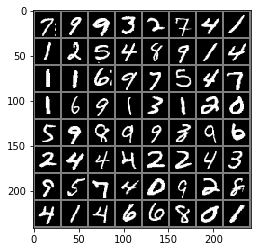

In [6]:
images, labels = next(iter(data_loader_train))
img = torchvision.utils.make_grid(images)

img = img.numpy().transpose(1,2,0)
std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
print([labels[i] for i in range(64)])
plt.imshow(img)

In [7]:
class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(1,64,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(stride=2,kernel_size=2))
        self.dense = torch.nn.Sequential(torch.nn.Linear(14*14*128,1024),
                                         torch.nn.ReLU(),
                                         torch.nn.Dropout(p=0.5),
                                         torch.nn.Linear(1024, 10))
    def forward(self, x):
        x = self.conv1(x)
        #x = self.conv2(x)
        x = x.view(-1, 14*14*128)
        x = self.dense(x)
        return x

In [8]:
model = Model()
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d (1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (dense): Sequential(
    (0): Linear(in_features=25088, out_features=1024)
    (1): ReLU()
    (2): Dropout(p=0.5)
    (3): Linear(in_features=1024, out_features=10)
  )
)


In [19]:
for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    print("Epoch {}/{}".format(epoch, n_epochs))
    print("-"*10)
    for data in data_loader_train:
        X_train, y_train = data
        X_train, y_train = Variable(X_train), Variable(y_train)
        outputs = model(X_train)
        _,pred = torch.max(outputs.data, 1)
        optimizer.zero_grad()
        loss = cost(outputs, y_train)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
        running_correct += torch.sum(pred == y_train.data)
    testing_correct = 0
    
    for data in data_loader_test:
        X_test, y_test = data
        X_test, y_test = Variable(X_test), Variable(y_test)
        outputs = model(X_test)
        _, pred = torch.max(outputs.data, 1)
        testing_correct += torch.sum(pred == y_test.data)
    print("Loss is:{:.4f}, Train Accuracy is:{:.4f}%, Test Accuracy is:{:.4f}".format(running_loss/len(data_train),
                                                                                      100*running_correct/len(data_train),
                                                                                      100*testing_correct/len(data_test)))
torch.save(model.state_dict(), "./data/model_parameter.pkl")

Epoch 0/5
----------
Loss is:0.0002, Train Accuracy is:99.6283%, Test Accuracy is:98.8800
Epoch 1/5
----------
Loss is:0.0002, Train Accuracy is:99.6833%, Test Accuracy is:98.8500
Epoch 2/5
----------
Loss is:0.0002, Train Accuracy is:99.6867%, Test Accuracy is:98.7300
Epoch 3/5
----------
Loss is:0.0001, Train Accuracy is:99.7750%, Test Accuracy is:98.7700
Epoch 4/5
----------
Loss is:0.0001, Train Accuracy is:99.7667%, Test Accuracy is:98.7500


In [20]:
cost = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
n_epochs = 5
model.load_state_dict(torch.load('./data/model_parameter.pkl'))

Predict Label is: [6, 0, 2, 4]
Real Label is: [6, 0, 2, 4]


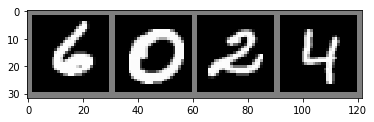

In [51]:
data_loader_test = torch.utils.data.DataLoader(dataset=data_test,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))
inputs = Variable(X_test)
pred = model(inputs)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Real Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.numpy().transpose(1,2,0)

std = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)